# **Data Science Engineering Methods and Tools**

# **Assignment 02: AutoML**

# Background

At a celebration honoring International Day of Happiness on March 20, the World Happiness 2015, which rates 155 nations according on their happiness levels, was unveiled. As more governments, companies, and members of civil society utilize happiness indices to guide their policy decisions, the report continues to acquire awareness on a global scale. Leading experts from a variety of disciplines, including economics, psychology, survey analysis, national statistics, health, and public policy, explain how well-being indicators can be used to evaluate a country's progress. The studies examine the current state of happiness in the globe and demonstrate how the personal and regional variations in happiness are explained by the new science of happiness.

# Abstract

The goal of this notebook is to predict the happiness score of countries around the world depending upon many factors such as economic production, social support, life expectancy, freedom, absense of corruption and generosity.

The World Happiness Report is a publication by the United Nations Sustainable Development Solutions Network that contains rankings of national happiness and analysis of the data behind these rankings. The report is based on surveys of people's subjective well-being and assesses factors such as economic production, social support, life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

I'm going do AutoML (H2O) with World Happiness Data to answer the following questions:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

In this notebook we are analyzing the data to check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in 10 different models, finally print the best model's performance.

# Information about the Dataset

Target Variable/Dependent Variable:

1.   Happiness Score: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

Predictor Variables/Independent Variables:


1. Country: Name of the country
2. Region: Region of the country belongs to or continent
1. Happiness Rank: Ranking of the countries according to their happiness score
2. Standard Error: the standard error of the happiness score
1. Economy (GDP per Capita): measures the monetary value of the final goods and services. The extent to which GDP contributes to the calculation of the Happiness score.
2. Family: The extent to which Family values contribute to the calculation of the Happiness score.  
1. Health (Life Expectancy): The extent to which Health / Life Expectancy contribute to the happiness score calculations.
2. Freedom: Freedom in all terms for people in any country contributing to the calculation of the Happiness score  
1. Trust (Government Corruption): Trust/ Government Corruption values of a country effecting Happiness score  
2. Generosity: the quality of being kind and generous.
2. Dystopia Residual: It is the sum of the dystopia happiness score (1.85) ie score of a hypothetical country having rank lower than the lowest ranking country in the report







# Initialize the H2O Cluster

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# for outlier preprocessing
!pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00


In [ ]:
!pip3 install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=61277eda57e225e7bc05583d16beeaefca9b7e60ed14b65fb9bb91d0935aefff
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


# Importing all the libararies required for the assignment

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:

!pip install requests
!pip install tabulate
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj38koetl
  JVM stdout: /tmp/tmpj38koetl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj38koetl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"7 days, 4 hours and 21 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_z4nvkx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Exploratory Data Analysis (EDA)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Hanagojiv/DataSci/main/2015.csv", index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [ ]:
data.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
data.shape

(158, 11)

In [ ]:
data.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
columns = list(data.columns)
print(columns)

['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [ ]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


This table shows summary statistics for a dataset with 158 observations and 12 variables.

The variables are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

# Correlation of Dataset

<Axes: >

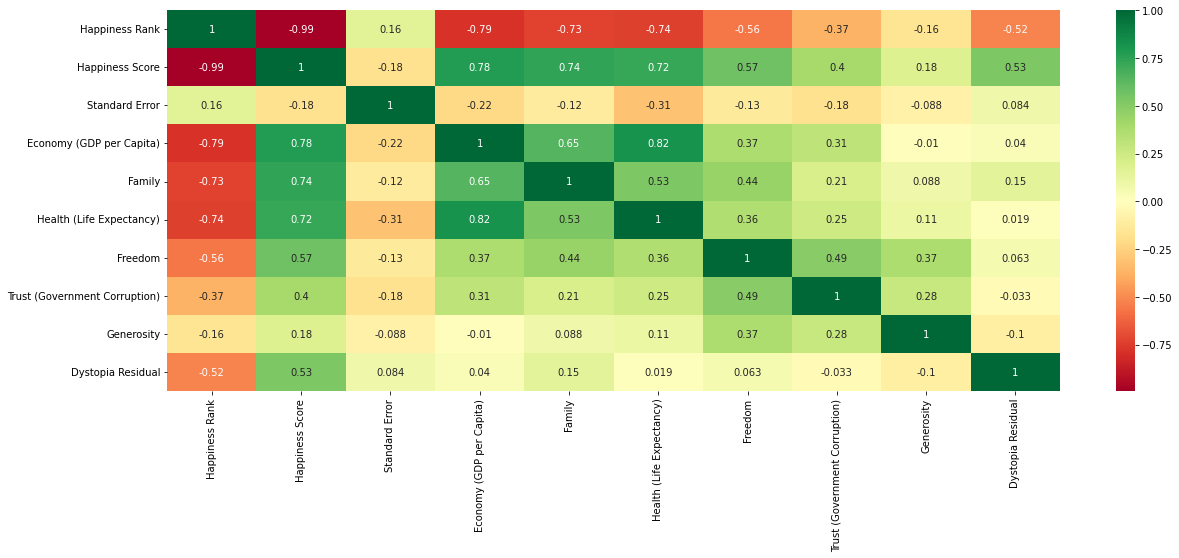

In [ ]:


plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
 # Heatmap showing correlation between the attributes.

# **Identifing predictor significance**

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Happiness Score'], data[['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.484e+09
Date:                Thu, 16 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:43:48   Log-Likelihood:                          1071.2
No. Observations:                 158   AIC:                                     -2126.
Df Residuals:                     150   BIC:                                     -2102.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Standard Error                    0.0002      0.001      0.170      0.865      -0.002       0.003
Economy (GDP per Capita)          1.0001      0.000   8941.449      0.000       1.000       1.000
Family                            1.0000      0.000   9035.666      0.000       1.000       1.000
Health (Life Expectancy)          0.9999      0.000   6269.121      0.000       1.000       1.000
Freedom                           0.9997      0.000   5072.809      0.000       0.999       1.000
Trust (Government Corruption)     0.9999      0.000   4446.338      0.000       0.999       1.000
Generosity                        1.0001      0.000   5057.866      0.000       1.000       1.000
Dystopia Residual                 1.0000   3.67e-05   2.73e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                       37.586   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.863
Skew:                          -0.062   Prob(JB):                       0.0196
Kurtosis:                       1.914   Cond. No.                         140.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **VIF(multicollinearity)**

In [ ]:
df = data[['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].dropna() #subset the dataframe

In [ ]:
# the independent variables set
X = data[['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                         feature        VIF
0                 Standard Error   7.166167
1       Economy (GDP per Capita)  21.759914
2                         Family  25.636995
3       Health (Life Expectancy)  23.090959
4                        Freedom  15.880880
5  Trust (Government Corruption)   3.497600
6                     Generosity   5.600094
7              Dystopia Residual  12.574726


# **Regularization**

In [ ]:
x = data[['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

y= data['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.03635812758385424

# Initialize the H2O Cluster

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"7 days, 4 hours and 21 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_z4nvkx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# **H2O**

In [ ]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.head()

Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Western Europe,6,7.406,0.0314,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2.4657
Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2.37119
Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [ ]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [ ]:
drift_data["is_train"].table()

is_train,Count
0,36
1,122


# **Now lets train 10 models by AutoML**

In [ ]:
x = list(set(train.col_names) - set(['Happiness Score']))

In [ ]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y='Happiness Score', training_frame=train)

AutoML progress: |
19:57:39.500: _train param, Dropping bad and constant columns: [is_train]


19:57:41.455: _train param, Dropping bad and constant columns: [is_train]

█
19:57:42.230: _train param, Dropping bad and constant columns: [is_train]
19:57:42.230: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 122.0.
19:57:42.236: _train param, Dropping bad and constant columns: [is_train]

█
19:57:43.467: _train param, Dropping bad and constant columns: [is_train]

████
19:57:48.338: _train param, Dropping bad and constant columns: [is_train]

██
19:57:51.117: _train param, Dropping bad and constant columns: [is_train]


19:57:52.669: _train param, Dropping bad and constant columns: [is_train]
19:57:53.785: _train param, Dropping bad and constant columns: [is_train]

██
19:57:55.411: _train param, Dropping bad and constant columns: [is_train]

█
19:57:58.658: _train param, Dropping bad and constant columns

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230316_195739


GLM Model: summary
    family    link      regularization              lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.01113 )  nlambda = 30, lambda.max = 111.28, lambda.min = 0.01113, lambda.1se = 0.01113  19                            19                             30                      AutoML_1_20230316_195739_training_py_6_sid_b145

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0006774647917033049
RMSE: 0.02602815382817815
MAE: 0.019892300494806666
RMSLE: 0.004949734991247496
Mean Residual Deviance: 0.0006774647917033049
R^2: 0.9994661239018118
Null degrees of freedom: 121
Residual degrees of freedom: 102
Null deviance: 154.8125208607372
Residual deviance: 0.0826507045878032
AIC: -502.03166079028085

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.0011064181892633856
RMSE: 0.0332628650188673
MAE: 0.025219949947435826
RMSLE: 0.006317025336800559
Mean Residual Deviance: 0.0011064181892633856
R^2: 0.9991280871964383
Null degrees of freedom: 121
Residual degrees of freedom: 102
Null deviance: 154.86227991242703
Residual deviance: 0.13498301909013305
AIC: -442.18753309819584

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0251667   0.00432672   0.0268486     0.0299833     0.0182108     0.0249686     0.0258222
mean_residual_deviance  0.00109898  0.000466197  0.00141823    0.00168744    0.000485306   0.000977672   0.00092624
mse                     0.00109898  0.000466197  0.00141823    0.00168744    0.000485306   0.000977672   0.00092624
null_deviance           30.9725     3.70794      34.5908       35.4452       28.4738       28.2678       28.0847
r2                      0.99915     0.000293165  0.998975      0.99881       0.99959       0.99917       0.999207
residual_deviance       0.0269966   0.0119695    0.0354557     0.042186      0.0116474     0.0234641     0.0222298
rmse                    0.0324939   0.00734206   0.0376594     0.0410785     0.0220297     0.0312677     0.0304342
rmsle                   0.00596884  0.0021806    0.0078539     0.00865904    0.00353585    0.00498534    0.00481005

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train         deviance_xval          deviance_se             alpha    iterations    training_rmse        training_deviance      training_mae          training_r2
---  -------------------  ----------  -----------  --------  ------------  ---------------------  ---------------------  ----------------------  -------  ------------  -------------------  ---------------------  --------------------  ------------------
     2023-03-16 19:57:42  0.000 sec   1            .11E3     20            1.1939311255295826     1.2069908144901487     0.0537390533209597      0.0
     2023-03-16 19:57:42  0.001 sec   2            .81E2     20            1.1676884506012686     1.1856457920333692     0.053335443216419635    0.0
     2023-03-16 19:57:42  0.002 sec   3            .59E2     20            1.1331247305079792     1.157336454035701      0.05278251258025732     0.0
     2023-03-16 19:57:42  0.003 sec   4            .43E2     20            1.0882538634820933     1.1201937358502465     0.0520

Interpretting the above training output:
The reported metrics are for the Generalized Linear model in H2O AutoML. The metrics are reported separately for the training data and the cross-validation data.

For the training data:

1. Mean Squared Error (MSE) is 0.0006774, which measures the average squared difference between the predicted and actual values.
2.   Root Mean Squared Error (RMSE) is 0.0260, which is the square root of MSE and provides a measure of how well the model fits the data.
3. Mean Absolute Error (MAE) is 0.01989, which measures the average absolute difference between the predicted and actual values.
4. Root Mean Squared Log Error (RMSLE) is 0.0049, which is the RMS of the logarithmic differences between the predicted and actual values.
5. R-squared (R^2) is 0.9995, which is a measure of how well the model fits the data.
The Null deviance, residual deviance, and AIC are also reported.


For the cross-validation data:

1. The metrics are little worse as compared to the training data, which is expected since the model was not trained on this data.
2.  The R^2 is 0.99, which is reasonable fit.

# Evaluation:

After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GLM_1_AutoML_1_20230316_195739,0.0252199,0.0332629,0.00110642,0.00631703,0.00110642
StackedEnsemble_BestOfFamily_1_AutoML_1_20230316_195739,0.0264047,0.0348154,0.00121211,0.00657868,0.00121211
StackedEnsemble_AllModels_1_AutoML_1_20230316_195739,0.0489254,0.0771506,0.00595222,0.0152266,0.00595222
GBM_5_AutoML_1_20230316_195739,0.100586,0.152614,0.0232911,0.0280553,0.0232911
GBM_3_AutoML_1_20230316_195739,0.105433,0.154117,0.0237519,0.0294895,0.0237519
XGBoost_3_AutoML_1_20230316_195739,0.122404,0.154972,0.0240164,0.0272633,0.0240164
GBM_4_AutoML_1_20230316_195739,0.126208,0.184294,0.0339642,0.0329313,0.0339642
GBM_2_AutoML_1_20230316_195739,0.137184,0.185883,0.0345524,0.0328344,0.0345524
XGBoost_2_AutoML_1_20230316_195739,0.143968,0.193257,0.0373483,0.0339625,0.0373483
XGBoost_1_AutoML_1_20230316_195739,0.15736,0.203819,0.0415423,0.0379708,0.0415423


# Best Performing Model

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230316_195739


GLM Model: summary
    family    link      regularization              lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.01113 )  nlambda = 30, lambda.max = 111.28, lambda.min = 0.01113, lambda.1se = 0.01113  19                            19                             30                      AutoML_1_20230316_195739_training_py_6_sid_b145

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0006774647917033049
RMSE: 0.026028

# Process of picking the best model

The difference between the first 3 models in the leaderboard is that the first two are ensemble models that combine multiple models to make predictions, while the third is a single XGBoost model. The Stacked Ensemble models use a combination of models to make predictions and generally result in better performance compared to a single model.

The model that was probably chosen as the best model is the "GLM_1_AutoML_1_20230316_195739" model because it has the lowest RMSE, which is a commonly used measure of the prediction error in regression problems. However, it is important to evaluate the model based on other metrics and use cross-validation to get a more accurate estimate of the model's performance on unseen data.

# Evaluation of best Model



In [ ]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.0006949385725937193
RMSE: 0.026361687590018196
MAE: 0.01702927221838328
RMSLE: 0.005549987507662756
Mean Residual Deviance: 0.0006949385725937193
R^2: 0.999470566037982
Null degrees of freedom: 35
Residual degrees of freedom: 16
Null deviance: 52.13397012125147
Residual deviance: 0.025017788613373892
AIC: -117.61716124752738

# Understanding the Results:

MSE (Mean Squared Error): In this case, the MSE is 0.000694, which means that the average squared difference between the predicted and actual delivery times is about 0.0005873.

RMSE (Root Mean Squared Error):is the square root of MSE and is used to provide a more interpretable measure of error in the same units as the target variable. The RMSE in this case is 0.02636, which means that on average the predictions are off by about 0.026 seconds.

MAE (Mean Absolute Error): In this case, the MAE is 0.0170, which means that on average the predictions are off by about 0.0170 seconds.

RMSLE (Root Mean Squared Log Error): measures the ratio between the predicted and actual values, where the values are first log-transformed. In this case, the RMSLE is 0.0055.

Mean Residual Deviance: measures the variance of the residuals, which is the difference between the predicted and actual values. A lower value indicates a better fit.

R^2 (Coefficient of Determination): A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variance. In this case, the R^2 is 0.99, which means that the model explains about 99% of the variance in the delivery times.

Null degrees of freedom and residual degrees of freedom: are the degrees of freedom for the null model (a model with no predictors) and the residual model, respectively. In this case, there are 35 null degrees of freedom and 16 residual degrees of freedom.

Null deviance and residual deviance: measure the deviance of the null model and residual model, respectively. A lower value indicates a better fit. In this case, the null deviance is 52.133 and the residual deviance is 0.025.

AIC (Akaike Information Criterion): is a measure of the relative quality of the model, taking into account the number of parameters. A lower value indicates a better fit. In this case, the AIC is -117.617.




# Explainability

H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

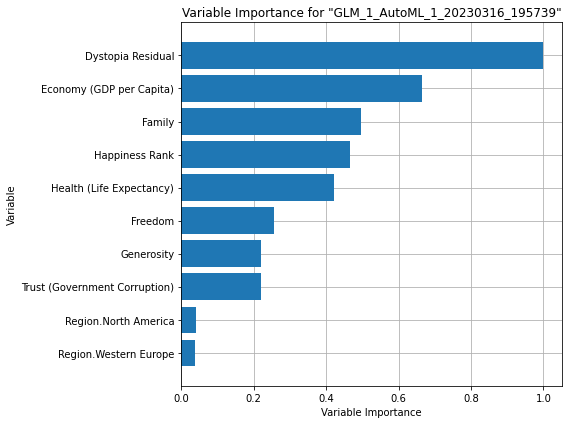

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

# Interpretting Feature Importance:

Dystopian Residual has the highest impact on the prediction outcome. This suggests that the ratings of the Dystopian Residual play a significant role in determining the Happiness Score of a country.

Economy (GDP per Capita) has the second highest impact on the prediction outcome. This suggests that the Economy (GDP per Capita) is to some extent significant in determining the Happiness Score of a country.

Health (Life Expectancy) has a moderate impact on the duration. This suggests that the Health is important to some extent and can afffect the happiness score of country.

Generosity has moderate impact on the prediction outcome.

Trust(Government Corruption) has a moderate impact on the prediction outcome. This suggests that the corruption has low to moderate effect on happiness score

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

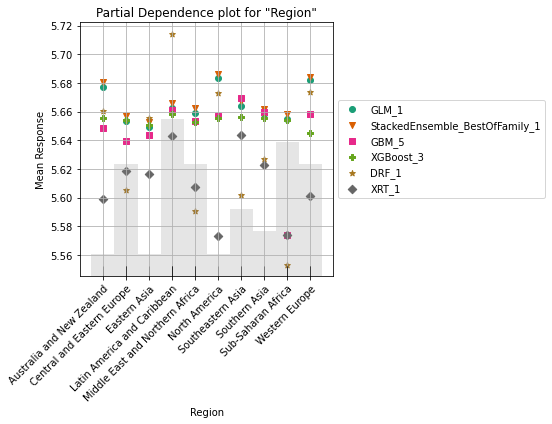

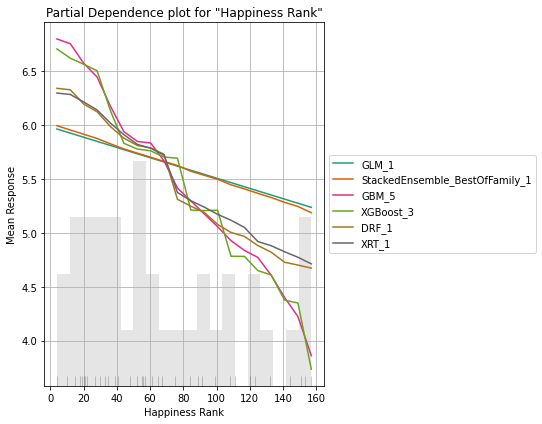

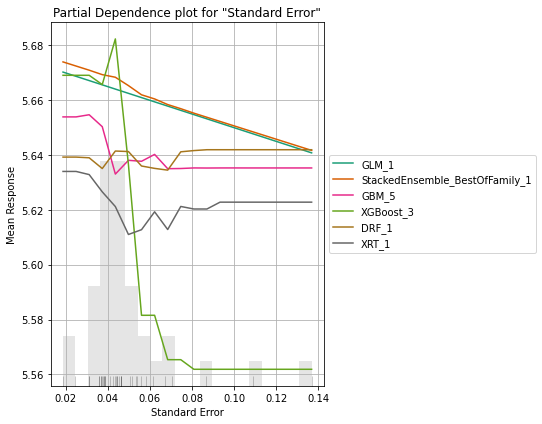

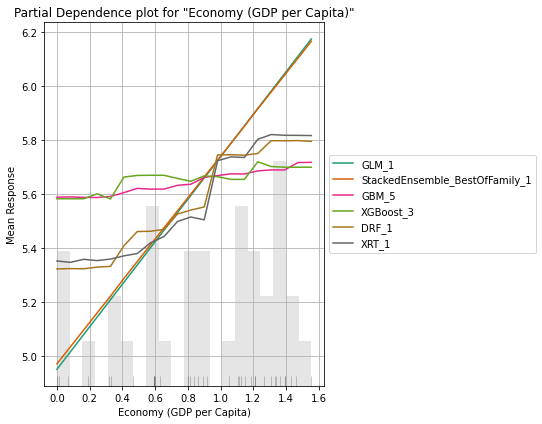

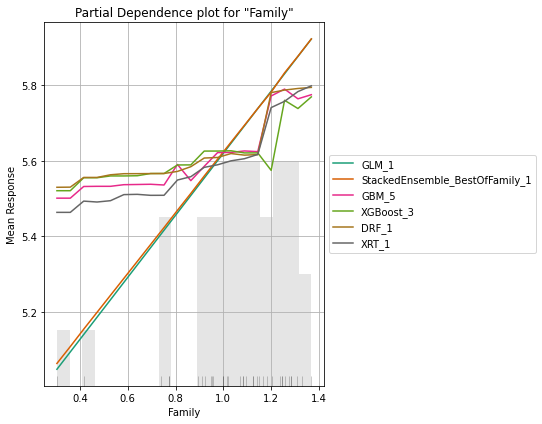

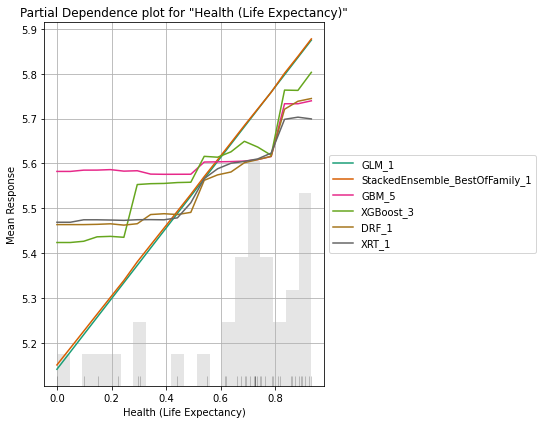

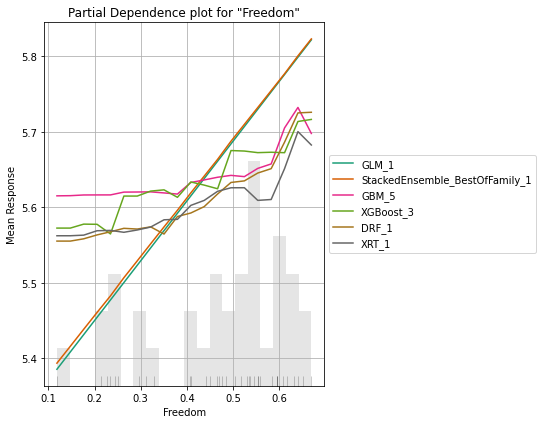

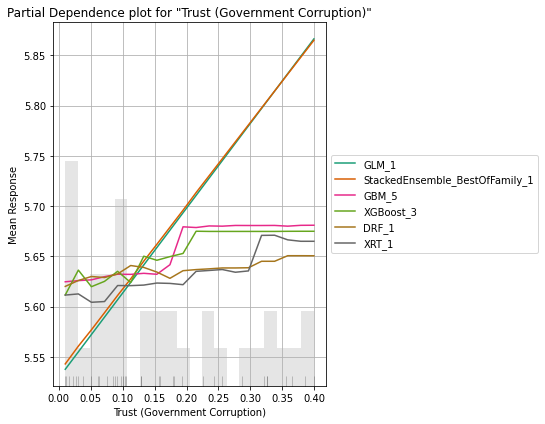

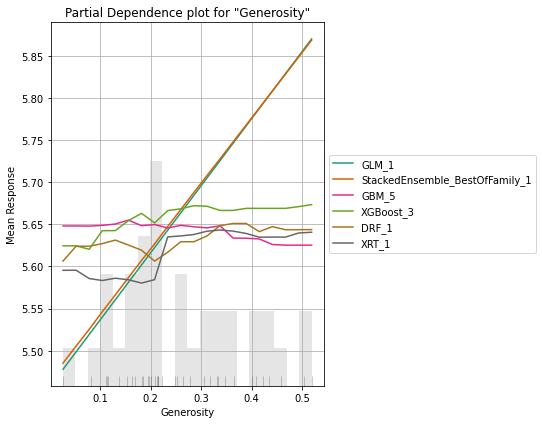

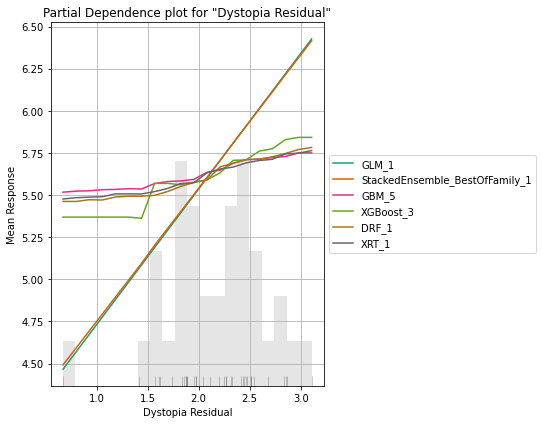

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

In [ ]:
#Local Explainability

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

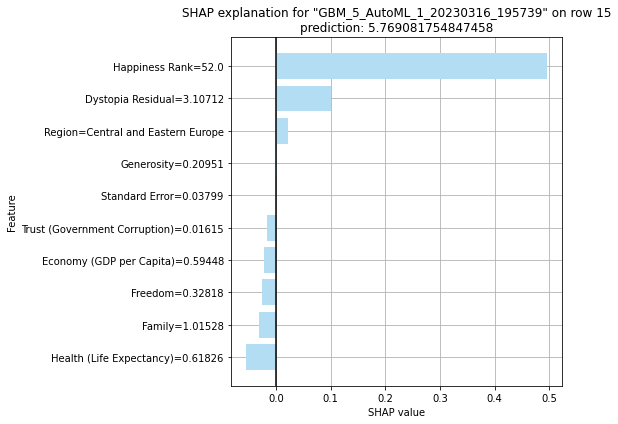

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")


**Is the relationship significant?**
> A: yes, because the R-sqaured is 1 which is very high and all features' p value is 0 except Standard Error, so the relationship is very much significant

**Are any model assumptions violated?**
> A: no, the model is regression which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**
> A: yes, from the VIF data, we could know that except Economy, Family,Health, Freedom and all other variables have  correlationship with each other except "Trust (Government Corruption)".

**In the multivariate models are predictor variables independent of all the other predictor variables?**


> A: No, the predictor variables are not independent of all the other predictor variables, we can see that from the correlation heat map.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

> A: Most significant variable is Dystopian Residual and least significant variable is  Trust(Government Corruption).

**Does the model make sense?**
> A: yes, the qustion is a regression question and models in AutoML can deal with it.

**Does regularization help?**
> No, the RMSE value for the best model is 0.0263 and RMSE in regularization 0.03635 which is higher thatn RMSE value for the best model.

**Which independent variables are significant?**
> The most significant predictor variable is "Dystopian Residual".

**Which hyperparameters are important?**
> All hyperparameters are important because they determined the way model works, however, there are some more important one, such as project_name, max_models, sort_metric, ridge(regularization) in GLM.

**Coding professionalism?**
> Yes.


# Conclusion:


In this notebook, we examined how H2O AutoML can be used to:



1.   Describe a dataset
2.   Train models with minimal human inputs
3.   Make predictions on a trained model
4.   Explain the model’s predictions

# References:



1.   AI Skunks AutoML notebook references.
2.   [H2O.AI](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)
3.  [Youtube: H2o](https://www.youtube.com/watch?v=91QljBnvM7s)


# Licences:
Copyright (c) 2023 Vivek Basavanth Hanagoji

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.